# Feature generation

## Feature generated

In this notebook we will try generate the following features based on the dataset : 

cumulated depth : somme des volumes disponibles jusqu’à un certain niveau
(p. ex. top 10) de chaque côté

imbalance of the book-order : (V_bid - V_ask)/(V_bid + V_ask)

Écart acheteur-vendeur (Spread) :
prix_ask_min – prix_bid_max

liquidity ratio : V_bid/V_ask

Statistical temporal features: Instantaneous volatility (variance over short windows), momentum (change in mid-price, trend indicators), and volume indicators (VWAP, average volume).

Other : book slope (slope of the volume-price curve), implied volatility indicators, etc.



Cannot be done with the current data :

Order Flow : somme entre volume total
d’ordres acheteurs et vendeurs exécutés (ou modifiés) sur une fenêtre

Order Flow Imbalance : différence entre volume total
d’ordres acheteurs et vendeurs exécutés (ou modifiés) sur une fenêtre

Multi-line order flow : Extension of OFI, measuring the net flow at the top N levels


In [12]:
import pandas as pd

In [13]:
coin = "XBT"
I = 0

df = pd.read_parquet(f'../data/preprocessed/DATA_{I}/{coin}_EUR.parquet')

df_cleaned = pd.DataFrame(index=df.index.get_level_values(0).unique())
features = pd.DataFrame(index=df.index.get_level_values(0).unique())

Keeping only one row data for each timestep

In [14]:
df_cleaned

""
timestamp
1.748488e+09
1.748488e+09
1.748488e+09
1.748488e+09
1.748488e+09
...
1.748523e+09
1.748523e+09
1.748523e+09


In [15]:
# Compute weighted average price "level-i-side-price" for each i and side by volume for each unique timestamp

# We'll compute the weighted average price for each side ('bid', 'ask') and each level (1 to 10)
# for each unique timestamp (ignoring row_id)

# For each level and side, compute the volume-weighted average price per timestamp and store in features

for side in ['bid', 'ask']:
    for i in range(1, 11):
        price_col = f'level-{i}-{side}-price'
        volume_col = f'level-{i}-{side}-volume'
        # Weighted average price per timestamp (ignoring row_id)
        weighted_avg = (
            df[price_col] * df[volume_col]
        ).groupby(level=0).sum() / df[volume_col].groupby(level=0).sum()
        # Assign weighted average price to df_cleaned DataFrame, indexed by unique timestamp
        df_cleaned.loc[weighted_avg.index, f'{price_col}'] = weighted_avg.values
        # Compute and assign average volume per timestamp
        avg_volume = df[volume_col].groupby(level=0).mean()
        df_cleaned.loc[avg_volume.index, f'{volume_col}'] = avg_volume.values

df_cleaned



,level-1-bid-price,level-1-bid-volume,level-2-bid-price,level-2-bid-volume,level-3-bid-price,level-3-bid-volume,level-4-bid-price,level-4-bid-volume,level-5-bid-price,level-5-bid-volume,...,level-6-ask-price,level-6-ask-volume,level-7-ask-price,level-7-ask-volume,level-8-ask-price,level-8-ask-volume,level-9-ask-price,level-9-ask-volume,level-10-ask-price,level-10-ask-volume
timestamp,,,,,,,,,,,,,,,,,,,,,
1.748488e+09,96207.1,0.831635,96205.7,2.686969,96204.4,2.310522,96203.5,0.071820,96202.300000,2.310572,...,96218.280259,1.165095,96218.363317,1.191005,96225.734157,1.190913,96225.968495,1.178058,96231.240557,0.289189
1.748488e+09,96207.1,0.831635,96205.7,2.686969,96204.4,2.310522,96203.5,0.071820,96202.300000,2.310572,...,96218.300000,4.620382,96220.400000,0.071820,96225.900000,2.310007,96229.400000,0.046109,96231.400000,0.532268
1.748488e+09,96207.1,0.831635,96205.7,2.686969,96204.4,2.310522,96203.5,0.071820,96202.300000,2.310572,...,96218.300000,2.310191,96220.400000,0.071820,96225.900000,2.310007,96229.400000,0.046109,96231.400000,0.532268
1.748488e+09,96207.1,0.831635,96205.7,2.686969,96204.4,2.310522,96203.5,0.071820,96202.300000,2.310572,...,96216.000000,0.020000,96218.300000,2.310191,96220.400000,0.071820,96225.900000,2.310007,96229.400000,0.046109
1.748488e+09,96207.1,0.831635,96205.7,2.686969,96204.4,2.310522,96203.5,0.071820,96202.300000,2.310572,...,96216.682477,2.506578,96218.403339,0.618458,96223.336104,1.750506,96225.870799,0.618511,96227.658826,0.855163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.748523e+09,95772.0,0.033861,95768.3,2.303450,95765.2,2.303526,95764.0,2.303554,95762.500000,0.000050,...,95776.700000,0.829401,95778.200000,0.046011,95778.500000,2.303208,95779.600000,0.024107,95784.600000,2.303060
1.748523e+09,95772.0,0.033861,95769.5,2.303422,95768.3,2.303450,95765.2,2.303526,95764.000000,2.303554,...,95778.025981,1.059540,95778.505357,0.791109,95781.539750,1.543458,95785.755949,1.159051,95785.806826,1.153695
1.748523e+09,95772.0,0.033861,95769.5,2.303422,95768.3,2.303450,95765.2,2.303526,95763.999967,1.151802,...,95778.500000,2.303208,95779.300000,2.303188,95779.600000,0.024107,95784.600000,2.303060,95788.200000,1.149986


In [23]:

for col in df_cleaned.columns:
    if col not in features.columns:
        features[col] = df_cleaned[col]

features

,V-bid-5-levels,V-ask-5-levels,bid-ask-imbalance-5-levels,spread,slope-bid-5-levels,slope-ask-5-levels,vwap-bid-5-levels,vwap-ask-5-levels,liquidity-ratio,mid-price,...,level-6-ask-price,level-6-ask-volume,level-7-ask-price,level-7-ask-volume,level-8-ask-price,level-8-ask-volume,level-9-ask-price,level-9-ask-volume,level-10-ask-price,level-10-ask-volume
timestamp,,,,,,,,,,,,,,,,,,,,,
1.748488e+09,8.211519,8.617270,-0.024111,0.1,-0.584545,0.940570,0.0,0.0,0.952914,96207.15,...,96218.280259,1.165095,96218.363317,1.191005,96225.734157,1.190913,96225.968495,1.178058,96231.240557,0.289189
1.748488e+09,8.211519,7.472074,0.047148,0.1,-0.584545,1.177719,0.0,0.0,1.098961,96207.15,...,96218.300000,4.620382,96220.400000,0.071820,96225.900000,2.310007,96229.400000,0.046109,96231.400000,0.532268
1.748488e+09,8.211519,7.472074,0.047148,0.1,-0.584545,1.177719,0.0,0.0,1.098961,96207.15,...,96218.300000,2.310191,96220.400000,0.071820,96225.900000,2.310007,96229.400000,0.046109,96231.400000,0.532268
1.748488e+09,8.211519,9.762472,-0.086289,0.1,-0.584545,0.829708,0.0,0.0,0.841131,96207.15,...,96216.000000,0.020000,96218.300000,2.310191,96220.400000,0.071820,96225.900000,2.310007,96229.400000,0.046109
1.748488e+09,8.211519,7.275961,0.060407,0.1,-0.584545,0.980247,0.0,0.0,1.128582,96207.15,...,96216.682477,2.506578,96218.403339,0.618458,96223.336104,1.750506,96225.870799,0.618511,96227.658826,0.855163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.748523e+09,6.944440,9.743071,-0.167708,0.1,-1.368001,0.379757,0.0,0.0,0.712757,95772.05,...,95776.700000,0.829401,95778.200000,0.046011,95778.500000,2.303208,95779.600000,0.024107,95784.600000,2.303060
1.748523e+09,9.247813,8.007988,0.071850,0.1,-0.865069,0.495702,0.0,0.0,1.154823,95772.05,...,95778.025981,1.059540,95778.505357,0.791109,95781.539750,1.543458,95785.755949,1.159051,95785.806826,1.153695
1.748523e+09,8.096060,6.011780,0.147739,0.1,-0.988139,1.014675,0.0,0.0,1.346699,95772.05,...,95778.500000,2.303208,95779.300000,2.303188,95779.600000,0.024107,95784.600000,2.303060,95788.200000,1.149986


## Generating bid-ask-imbalance or cumulative depth

Close to 1 → strong buying pressure.
Close to -1 → strong selling pressure.
Near 0 → balanced depth.


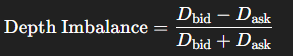


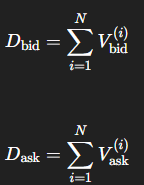

In [16]:
N_level = 5

features[f"V-bid-{N_level}-levels"] = df_cleaned["level-1-bid-volume"]
features[f"V-ask-{N_level}-levels"] = df_cleaned["level-1-ask-volume"]

for i in range(2, N_level + 1):
    features[f"V-bid-{N_level}-levels"] += df_cleaned[f"level-{i}-bid-volume"]
    features[f"V-ask-{N_level}-levels"] += df_cleaned[f"level-{i}-ask-volume"]

features[f"bid-ask-imbalance-{N_level}-levels"] = (features[f"V-bid-{N_level}-levels"] - features[f"V-ask-{N_level}-levels"])/(features[f"V-bid-{N_level}-levels"] + features[f"V-ask-{N_level}-levels"])


## Generating spread

In [17]:
features["spread"] = df_cleaned["level-1-ask-price"] - df_cleaned["level-1-bid-price"]

## Generating book slope

Used to estimate the steepness of liquidity
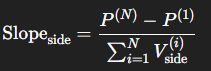

In [18]:
N_level = 5

for side in ['bid', 'ask']:
    price_col = [f"level-{i}-{side}-price" for i in range(1, N_level + 1)]
    volume_col = [f"level-{i}-{side}-volume" for i in range(1, N_level + 1)]
    P_N = df_cleaned[price_col[-1]]
    P_1 = df_cleaned[price_col[0]]
    V_sum = sum([df_cleaned[col] for col in volume_col])
    features[f"slope-{side}-{N_level}-levels"] = (P_N - P_1) / V_sum


## Generating Volume-Weighted Average Price Depth (VWAP Depth)

This gives a weighted price level that reflects available liquidity
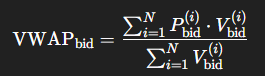

In [ ]:
# Calculate VWAP for bid and ask sides over N_level depth
N_level = 5

# Bid side VWAP
bid_price_cols = [f"level-{i}-bid-price" for i in range(1, N_level + 1)]
bid_volume_cols = [f"level-{i}-bid-volume" for i in range(1, N_level + 1)]
bid_prices = df_cleaned[bid_price_cols]
bid_volumes = df_cleaned[bid_volume_cols]
vwap_bid = (bid_prices * bid_volumes).sum(axis=1) / bid_volumes.sum(axis=1)
features[f"vwap-bid-{N_level}-levels"] = vwap_bid

# Ask side VWAP
ask_price_cols = [f"level-{i}-ask-price" for i in range(1, N_level + 1)]
ask_volume_cols = [f"level-{i}-ask-volume" for i in range(1, N_level + 1)]
ask_prices = df_cleaned[ask_price_cols]
ask_volumes = df_cleaned[ask_volume_cols]
vwap_ask = (ask_prices * ask_volumes).sum(axis=1) / ask_volumes.sum(axis=1)
features[f"vwap-ask-{N_level}-levels"] = vwap_ask

features[f"avg-vwap-diff-{N_level}-levels"] = features[f"vwap-bid-{N_level}-levels"] - features[f"vwap-ask-{N_level}-levels"]

## Generating Liquidity Ratio

liquidity ratio : V_bid/V_ask

In [20]:
N_level = 5

features["liquidity-ratio"] = features[f"V-bid-{N_level}-levels"] / features[f"V-ask-{N_level}-levels"]

## Generating Instantaneous volatility (variance over short windows), momentum (change in mid-price, trend indicators), and volume indicators (VWAP, average volume)

Note : average is done in terms over the number-of-transactions-window, and not over a time-window. This is done for comuting reasons.

In [ ]:
window = 20  # You can adjust the window size as needed

# Mid-price calculation using df_cleaned
mid_price = (df_cleaned["level-1-bid-price"] + df_cleaned["level-1-ask-price"]) / 2

# Instantaneous volatility (rolling variance of mid-price)
features["inst_volatility"] = mid_price.rolling(window=window).var()

# Momentum (change in mid-price)
features["momentum"] = mid_price.diff(periods=window)

# Trend indicator (rolling mean of mid-price)
features["mid_price_trend"] = mid_price.rolling(window=window).mean()

# VWAP over all levels (already computed for N_level=5)
N_level = 5
features["avg-vwap-diff-{N_level}-levels"] = (features[f"vwap-bid-{N_level}-levels"] - features[f"vwap-ask-{N_level}-levels"]) / 2

# Average volume over short window (using level-1 volumes)
features["avg-bid-volume-level-1"] = df_cleaned["level-1-bid-volume"].rolling(window=window).mean()
features["avg-ask-volume-level-1"] = df_cleaned["level-1-ask-volume"].rolling(window=window).mean()


ValueError: window must be an integer 0 or greater

## Saving to csv

In [ ]:
features.to_parquet(f'../data/features/DATA_{I}/{coin}_EUR.parquet', index=True)

In [ ]:
features